In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [13]:
rd.uniform(1,5)

1.0575606717755184

In [149]:
def oddsprob(wins,losses):
    odds = losses/wins
    return (1/(odds))

def profit_responsive(bankroll,odds,outcome):
    if odds >= 10:
        bet = bankroll * 0.02
    elif odds > 2:
        bet = bankroll * 0.05
    else:
        bet = bankroll * 0.08
    if outcome == 0:
        profit = -bet
    else:
        profit = bet*odds
    return (profit)

def profit(bankroll,odds,percent,outcome):
    bet = bankroll * percent/100
    if outcome == 0:
        profit = -bet
    else:
        profit = bet*odds
    return(profit)

In [15]:
df = pd.read_csv("tips.csv")
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True


In [16]:
red_df = df[["Tipster","Bet Type","Odds","Result"]]
red_df["Result"] = red_df["Result"].replace("Lose",0).replace("Win",1)
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38248 entries, 0 to 38247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tipster   38248 non-null  object 
 1   Bet Type  38248 non-null  object 
 2   Odds      38248 non-null  float64
 3   Result    38248 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


c:\users\jgeis\anaconda3\envs\pythonadv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
bankroll = 1000
# odds = red_df["Odds"].to_list()
# results = red_df["Result"].to_list()
red_df["Bankroll"] = red_df.apply(lambda row: bankroll, axis=1)
red_df["2%"] = red_df.apply(lambda row: profit(bankroll,row.Odds,2,row.Result),axis=1)
red_df["5%"] = red_df.apply(lambda row: profit(bankroll,row.Odds,5,row.Result),axis=1)
red_df["7%"] = red_df.apply(lambda row: profit(bankroll,row.Odds,7,row.Result),axis=1)
red_df["10%"] = red_df.apply(lambda row: profit(bankroll,row.Odds,10,row.Result),axis=1)
red_df["15%"] = red_df.apply(lambda row: profit(bankroll,row.Odds,15,row.Result),axis=1)
red_df["Multi%"] = red_df.apply(lambda row: profit_responsive(bankroll,row.Odds,row.Result),axis=1)


c:\users\jgeis\anaconda3\envs\pythonadv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\jgeis\anaconda3\envs\pythonadv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\jgeis\anaconda3\envs\pythonadv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [18]:
red_df.head()

,Tipster,Bet Type,Odds,Result,Bankroll,2%,5%,7%,10%,15%,Multi%
0,Tipster A,Win,8.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
1,Tipster A,Win,4.50,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
2,Tipster A,Win,7.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
3,Tipster A,Win,5.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
4,Tipster A,Win,4.33,1,1000,86.6,216.5,303.1,433.0,649.5,216.5


In [19]:
red_df.describe()

,Odds,Result,Bankroll,2%,5%,7%,10%,15%,Multi%
count,38248.000000,38248.000000,38248.0,38248.000000,38248.000000,38248.000000,38248.000000,38248.000000,38248.000000
mean,10.994968,0.200873,1000.0,17.702175,44.255438,61.957613,88.510876,132.766315,25.851888
std,11.004589,0.400659,0.0,101.373411,253.433527,354.806938,506.867055,760.300582,141.104128
min,1.070000,0.000000,1000.0,-20.000000,-50.000000,-70.000000,-100.000000,-150.000000,-80.000000
25%,5.000000,0.000000,1000.0,-20.000000,-50.000000,-70.000000,-100.000000,-150.000000,-50.000000
50%,8.000000,0.000000,1000.0,-20.000000,-50.000000,-70.000000,-100.000000,-150.000000,-20.000000
75%,13.000000,0.000000,1000.0,-20.000000,-50.000000,-70.000000,-100.000000,-150.000000,-20.000000
max,407.000000,1.000000,1000.0,2020.000000,5050.000000,7070.000000,10100.000000,15150.000000,2020.000000


In [20]:
red_df.to_csv("profitBruteForce.csv",index=False)

In [150]:
df = pd.read_csv("profitBruteForce.csv")
df = df.loc[df["Bet Type"]=="Win",:]
df.head()

,Tipster,Bet Type,Odds,Result,Bankroll,2%,5%,7%,10%,15%,Multi%
0,Tipster A,Win,8.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
1,Tipster A,Win,4.50,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
2,Tipster A,Win,7.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
3,Tipster A,Win,5.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
4,Tipster A,Win,4.33,1,1000,86.6,216.5,303.1,433.0,649.5,216.5


In [35]:
df_tip = df.groupby("Tipster")
df_tip.median()

,Odds,Result,Bankroll,2%,5%,7%,10%,15%,Multi%
Tipster,,,,,,,,,
Tipster A,3.50,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
Tipster A1,8.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-20.0
Tipster B,7.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-20.0
Tipster B1,4.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
Tipster C,5.50,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
Tipster C1,6.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0
Tipster D,13.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-20.0
Tipster D1,13.00,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-20.0
Tipster E,4.33,0,1000,-20.0,-50.0,-70.0,-100.0,-150.0,-50.0


In [33]:
df_tip.mean()

,Odds,Result,Bankroll,2%,5%,7%,10%,15%,Multi%
Tipster,,,,,,,,,
Tipster A,7.020676,0.369647,1000.0,37.203757,93.009391,130.213148,186.018783,279.028174,66.819684
Tipster A1,15.465392,0.138594,1000.0,11.643663,29.109158,40.752821,58.218316,87.327473,13.121709
Tipster B,14.827535,0.170974,1000.0,14.539563,36.348907,50.888469,72.697813,109.046720,18.923260
Tipster B1,4.983300,0.274329,1000.0,6.990469,17.476171,24.466640,34.952343,52.428514,17.266760
Tipster C,13.999776,0.245109,1000.0,49.947871,124.869678,174.817549,249.739356,374.609033,56.207652
Tipster C1,10.283733,0.217565,1000.0,15.204391,38.010978,53.215369,76.021956,114.032934,26.396607
Tipster D,19.767206,0.129555,1000.0,23.225371,58.063428,81.288799,116.126856,174.190283,24.217274
Tipster D1,20.040396,0.164228,1000.0,46.001793,115.004483,161.006277,230.008966,345.013450,46.897829
Tipster E,4.990938,0.253784,1000.0,6.854811,17.137027,23.991838,34.274054,51.411081,17.558324


In [36]:
df_accuracy = df.groupby(["Tipster","Result"])

In [37]:
df_accuracy.sum()

Odds  Bankroll        2%        5%        7%       10%  \
Tipster    Result                                                               
Tipster A  0        1781.97    421000   -8420.0  -21050.0  -29470.0  -42100.0   
           1         725.65    201000   14513.0   36282.5   50795.5   72565.0   
Tipster A1 0       22142.33   1827000  -36540.0  -91350.0 -127890.0 -182700.0   
           1        2191.02    301000   43820.4  109551.0  153371.4  219102.0   
Tipster B  0        4512.08    340000   -6800.0  -17000.0  -23800.0  -34000.0   
...                     ...       ...       ...       ...       ...       ...   
Tipster X  1        5588.90    623000  111778.0  279445.0  391223.0  558890.0   
Tipster Y  0        6637.68    929000  -18580.0  -46450.0  -65030.0  -92900.0   
           1        1263.76    200000   25275.2   63188.0   88463.2  126376.0   
Tipster Z  0        2347.96    491000   -9820.0  -24550.0  -34370.0  -49100.0   
           1         783.78    186000   15675.6   39189.0   54864.6   78378.0   

                        15%    Multi%  
Tipster    Result                      
Tipster A  0       -63150.0  -21320.0  
           1       108847.5   34637.0  
Tipster A1 0      -274050.0  -68100.0  
           1       328653.0   79085.7  
Tipster B  0       -51000.0  -12890.0  
...                     ...       ...  
Tipster X  1       838335.0  195685.0  
Tipster Y  0      -139350.0  -42340.0  
           1       189564.0   56906.0  
Tipster Z  0       -73650.0  -24550.0  
           1       117567.0   39417.0  

[62 rows x 8 columns]

In [40]:
df_accuracy.mean()

Odds  Bankroll          2%          5%          7%  \
Tipster    Result                                                            
Tipster A  0        4.232708      1000  -20.000000  -50.000000  -70.000000   
           1        3.610199      1000   72.203980  180.509950  252.713930   
Tipster A1 0       12.119502      1000  -20.000000  -50.000000  -70.000000   
           1        7.279136      1000  145.582724  363.956811  509.539535   
Tipster B  0       13.270824      1000  -20.000000  -50.000000  -70.000000   
...                      ...       ...         ...         ...         ...   
Tipster X  1        8.970947      1000  179.418941  448.547352  627.966292   
Tipster Y  0        7.144973      1000  -20.000000  -50.000000  -70.000000   
           1        6.318800      1000  126.376000  315.940000  442.316000   
Tipster Z  0        4.781996      1000  -20.000000  -50.000000  -70.000000   
           1        4.213871      1000   84.277419  210.693548  294.970968   

                          10%          15%      Multi%  
Tipster    Result                                       
Tipster A  0      -100.000000  -150.000000  -50.641330  
           1       361.019900   541.529851  172.323383  
Tipster A1 0      -100.000000  -150.000000  -37.274220  
           1       727.913621  1091.870432  262.743189  
Tipster B  0      -100.000000  -150.000000  -37.911765  
...                       ...          ...         ...  
Tipster X  1       897.094703  1345.642055  314.101124  
Tipster Y  0      -100.000000  -150.000000  -45.575888  
           1       631.880000   947.820000  284.530000  
Tipster Z  0      -100.000000  -150.000000  -50.000000  
           1       421.387097   632.080645  211.919355  

[62 rows x 8 columns]

In [45]:
df.loc[df["Result"]==1,:]

,Tipster,Bet Type,Odds,Result,Bankroll,2%,5%,7%,10%,15%,Multi%
4,Tipster A,Win,4.33,1,1000,86.6,216.5,303.1,433.0,649.5,216.5
14,Tipster A,Win,3.25,1,1000,65.0,162.5,227.5,325.0,487.5,162.5
23,Tipster A,Win,4.50,1,1000,90.0,225.0,315.0,450.0,675.0,225.0
27,Tipster A,Win,11.00,1,1000,220.0,550.0,770.0,1100.0,1650.0,220.0
31,Tipster A,Win,4.33,1,1000,86.6,216.5,303.1,433.0,649.5,216.5
...,...,...,...,...,...,...,...,...,...,...,...
38204,Tipster E1,Win,7.00,1,1000,140.0,350.0,490.0,700.0,1050.0,350.0
38211,Tipster E1,Win,3.75,1,1000,75.0,187.5,262.5,375.0,562.5,187.5
38213,Tipster E1,Win,5.50,1,1000,110.0,275.0,385.0,550.0,825.0,275.0
38226,Tipster E1,Win,5.00,1,1000,100.0,250.0,350.0,500.0,750.0,250.0


In [129]:
# profitarr = [profit(1000,5,x) for x in oddsarr]
low = []
med = []
high = []
vhigh = []
vvhigh = []
dfLow = df.loc[df["Odds"]<5,:]
dfMed = df.loc[df["Odds"]>=5,:].loc[df["Odds"]<10,:]
dfHigh = df.loc[df["Odds"]>=10,:].loc[df["Odds"]<20,:]
dfVhigh = df.loc[df["Odds"]>=20,:].loc[df["Odds"]<40,:]
dfVVhigh = df.loc[df["Odds"]>=40,:]
PP = np.arange(1,25,1)
bank = 1000
for i in PP:
#     profitarra = [profit(1000,x,i,y) for x in df["Odds"] for y in df["Outcome"]
    low += [(sum([profit(bank,x,i,y) for x in dfLow["Odds"].to_numpy() for y in dfLow["Result"].to_numpy()]))]
#     low.append(sum(profitarra[0:100]))
#     med.append(sum(profitarra[100:200]))
#     high.append(sum(profitarra[200:300]))
#     vhigh.append(sum(profitarra[300:400]))


KeyboardInterrupt: 

In [168]:
odds_only = df["Odds"].to_numpy()
res_only = df["Result"].to_numpy()
df_big = df[["Odds","Result"]]

bankroll = 1000
PP = np.arange(1,25,1)

low = []
med = []
high = []
vhigh = []
vvhigh = []
for p in PP:
    pprofit = []
    for x,y in zip(odds_only,res_only):
        pprofit.append(profit(bankroll,x,p,y))
    df_big[f'{p}'] = pprofit
 

c:\users\jgeis\anaconda3\envs\pythonadv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [170]:
dfLow = df_big.loc[df["Odds"]<5,:]
dfMed = df_big.loc[df["Odds"]>=5,:].loc[df["Odds"]<10,:]
dfHigh = df_big.loc[df["Odds"]>=10,:].loc[df["Odds"]<20,:]
dfVhigh = df_big.loc[df["Odds"]>=20,:].loc[df["Odds"]<40,:]
dfVVhigh = df_big.loc[df["Odds"]>=40,:]

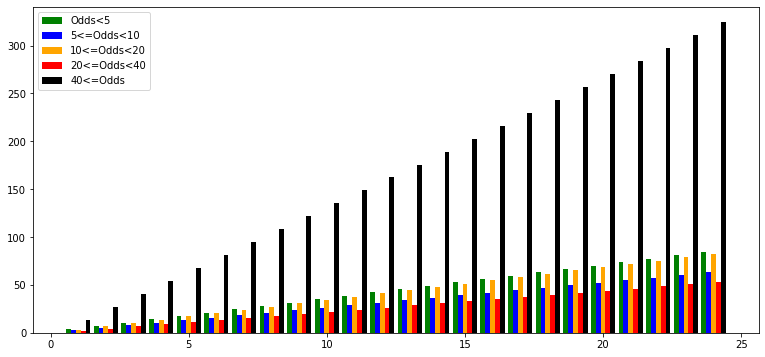

In [193]:
lowBar = dfLow.drop(columns=["Result","Odds"]).mean()
medBar = dfMed.drop(columns=["Result","Odds"]).mean()
highBar = dfHigh.drop(columns=["Result","Odds"]).mean()
vhighBar = dfVhigh.drop(columns=["Result","Odds"]).mean()
vvhighBar = dfVVhigh.drop(columns=["Result","Odds"]).mean()

plt.figure(figsize=(13,6))
plt.bar(PP-0.350,lowBar,width=0.175,label="Odds<5",color="green")
plt.bar(PP-0.175,medBar,width=0.175,label="5<=Odds<10",color="blue")
plt.bar(PP,highBar,width=0.175,label="10<=Odds<20",color="orange")
plt.bar(PP+0.175,vhighBar,width=0.175,label="20<=Odds<40",color="red")
plt.bar(PP+0.350,vvhighBar,width=0.175,label="40<=Odds",color="black")
plt.legend()
plt.show()

In [ ]:
# odds_only = df["Odds"].to_numpy()
# res_only = df["Result"].to_numpy()

# bankroll = 1000
# PP = np.arange(1,25,1)

# low = []
# med = []
# high = []
# vhigh = []
# vvhigh = []
# for p in PP:
#     lowl = []
#     medl = []
#     highl = []
#     vhighl = []
#     vvhighl = []
#     for i,x in enumerate(odds_only):
#         if x < 5:
#             lowl.append(profit(bankroll,x,p,res_only[i]))
#         elif x < 10:
#             medl.append(profit(bankroll,x,p,res_only[i]))
#         elif x < 20:
#             highl.append(profit(bankroll,x,p,res_only[i]))
#         elif x < 40:
#             vhighl.append(profit(bankroll,x,p,res_only[i]))
#         else:
#             vvhighl.append(profit(bankroll,x,p,res_only[i]))
#     low.append(sum(lowl))
#     med.append(sum(medl))
#     high.append(sum(highl))
#     vhigh.append(sum(vhighl))
#     vvhigh.append(sum(vvhighl))

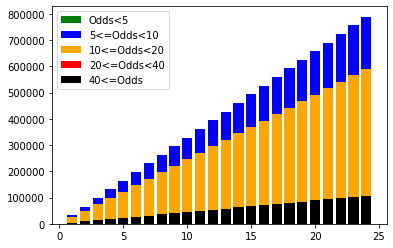

In [163]:
plt.figure()
plt.bar(PP,low,label="Odds<5",color="green")
plt.bar(PP,med,label="5<=Odds<10",color="blue")
plt.bar(PP,high,label="10<=Odds<20",color="orange")
plt.bar(PP,vhigh,label="20<=Odds<40",color="red")
plt.bar(PP,vvhigh,label="40<=Odds",color="black")
plt.legend()
    

In [154]:
vvhighh

array([8.  , 4.5 , 7.  , ..., 7.  , 4.33, 5.  ])

# Just Theory

In [73]:
def hard_profit(bankroll,percent,odds):
    prob = 1/odds
    if rd.random() <= prob:
        profit = bankroll*(percent/100)*odds
    else:
        profit = -bankroll*(percent/100)
    return(profit)

# generate random odds array
oddsarr = []
for x in range(0,25000):
    oddsarr.append(rd.uniform(1.07,12))
for x in range(0,5000):
    oddsarr.append(rd.uniform(12,25))
for x in range(0,500):
    oddsarr.append(rd.uniform(25,41))
for x in range(0,100):
    oddsarr.append(rd.uniform(41,53))
    
oddsarr = np.array(oddsarr)
print(len(oddsarr))

30600


(array([3959., 3957., 3928., 4013., 3952., 3869., 1740.,  683.,  653.,
         649.,  679.,  676.,  705.,  541.,   39.,   56.,   58.,   49.,
          62.,   57.,   57.,   56.,   48.,   28.,   13.,   15.,   10.,
          16.,   13.,   19.]),
 array([ 1.07030622,  2.79532811,  4.52035   ,  6.24537189,  7.97039378,
         9.69541567, 11.42043756, 13.14545945, 14.87048133, 16.59550322,
        18.32052511, 20.045547  , 21.77056889, 23.49559078, 25.22061267,
        26.94563456, 28.67065645, 30.39567834, 32.12070023, 33.84572212,
        35.57074401, 37.2957659 , 39.02078779, 40.74580968, 42.47083157,
        44.19585346, 45.92087535, 47.64589724, 49.37091913, 51.09594102,
        52.82096291]),
 <BarContainer object of 30 artists>)

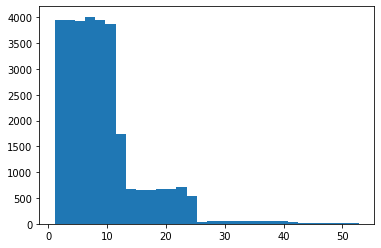

In [74]:
plt.figure()
plt.hist(oddsarr,bins=30)

In [75]:
df_odds = pd.DataFrame(oddsarr)
df_odds.rename(columns={0:"Odds"})
df_odds.head()

,0
0,8.159973
1,11.822075
2,6.826592
3,9.821816
4,2.202391


In [77]:
profitarr = [hard_profit(1000,5,x) for x in oddsarr]

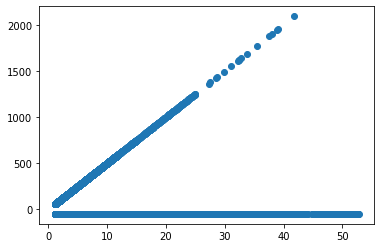

In [78]:
plt.figure()
plt.scatter(oddsarr,profitarr)

(0.0, 30.0)

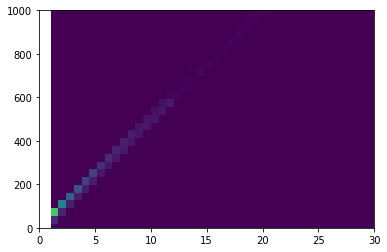

In [92]:
plt.hist2d(oddsarr,profitarr,bins=[75,60])
plt.ylim(0,1000)
plt.xlim(0,30)

In [ ]:
# part 2

In [194]:
oddsarra = []
profitarra = []
p = 10
for x in range(0,100):
    rand = rd.uniform(1.07,4)
    oddsarra.append(rand)
#     profitarra.append(hard_profit(1000,p,rand))
for x in range(0,100):
    rand = rd.uniform(4,10)
    oddsarra.append(rand)
#     profitarra.append(hard_profit(1000,p,rand))
for x in range(0,100):
    rand = rd.uniform(10,20)
    oddsarra.append(rand)
#     profitarra.append(hard_profit(1000,p,rand))
for x in range(0,100):
    rand = rd.uniform(20,40)
    oddsarra.append(rand)
#     profitarra.append(hard_profit(1000,p,rand))
    


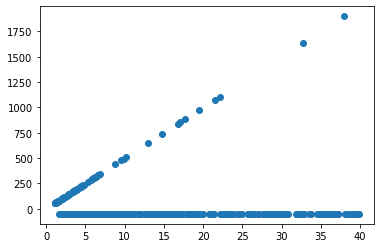

In [195]:
profitarra = [hard_profit(1000,5,x) for x in oddsarra]
plt.scatter(oddsarra,profitarra)

In [196]:
profitarra = [hard_profit(1000,5,x) for x in oddsarra]
low = []
med = []
high = []
vhigh = []
PP = np.arange(1,25,1)
for i in PP:
    profitarra = [hard_profit(1000,i,x) for x in oddsarra]
    low.append(sum(profitarra[0:100]))
    med.append(sum(profitarra[100:200]))
    high.append(sum(profitarra[200:300]))
    vhigh.append(sum(profitarra[300:400]))


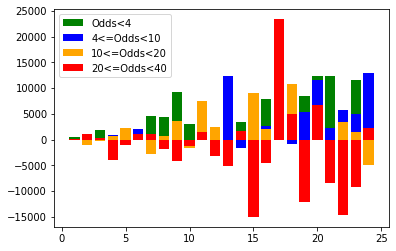

In [197]:
plt.figure()
plt.bar(PP,low,label="Odds<4",color="green")
plt.bar(PP,med,label="4<=Odds<10",color="blue")
plt.bar(PP,high,label="10<=Odds<20",color="orange")
plt.bar(PP,vhigh,label="20<=Odds<40",color="red")
plt.legend()
    